In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [83]:
smcl_data = pd.read_csv("SMCL_ANF_Items.csv")

C:\Users\rho62\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
#Renamed the columns for column V, W, X

smcl_data2 = smcl_data.rename(columns={'245|a': 'Book Title','100|a': 'Author',
                                      '008 Date One': 'Published Date'})

#dropped columns

smcl_data_clean = smcl_data2.drop(['LOCATION', 'BARCODE', 'RECORD #(ITEM)',
                 'I TYPE', 'MAT TYPE', 'OTHER CALL', 'MATERIAL'], axis=1)

#created dictionary for the BRANCH column and replaced with actual location

branch_dict = {'0k': 'Bookmobile', '1a':'Atherton', '1b':'Belmont', '1r':'Brisbane','1e':'East Palo Alto','1f':'Foster City'
,'1h':'Half Moon Bay','1m':'Millbrae','1p':'Pacifica Sharp Park','1z':'Pacifica Sanchez','1s':'San Carlos','1v':'Portola Valley','1w':'Woodside'}

#looking for values to combine in Call # field
smcl_data_clean["CALL #"].value_counts()

#cleaning up and only using initial categorey 
smcl_data_clean["CALL #"] = smcl_data_clean["CALL #"].str.split(" ", 1, expand=True)

smcl_data_clean = smcl_data_clean.replace({"BRANCH": branch_dict})

In [85]:
#looking for values to combine in Call # field
smcl_data_clean["CALL #"].value_counts()

#cleaning up and only using initial categorey 
smcl_data_clean["CALL #"] = smcl_data_clean["CALL #"].str.split(" ", 1, expand=True)
smcl_data_clean.head()

,BRANCH,CREATED(ITEM),RECORD #(BIBLIO),CREATED(BIBLIO),YTDCIRC,LYRCIRC,TOT CHKOUT,TOT RENEW,# RENEWALS,STATUS,DUE DATE,LOUTDATE,LCHKIN,CALL #,Book Title,Author,Published Date
0,Portola Valley,7/18/2005 8:45,b10000203,7/18/2005 8:45,0,0,15,6,0,m,- -,4/28/2016 15:35,5/24/2016 11:00,NATURE,Encyclopedia of mammals /,NaN,1998
1,Pacifica Sanchez,7/18/2005 8:45,b10000276,7/18/2005 8:45,0,0,30,11,0,-,- -,4/18/2018 17:17,5/14/2018 10:40,NATURE,Encyclopedia of fishes /,NaN,1998
2,Foster City,7/18/2005 8:45,b1000032x,7/18/2005 8:45,2,3,40,23,0,-,- -,11/24/2019 16:41,1/10/2020 10:47,NATURE,Encyclopedia of birds /,NaN,1998
3,Millbrae,7/18/2005 8:45,b1000032x,7/18/2005 8:45,0,0,17,9,0,-,- -,7/12/2018 15:36,7/14/2018 11:13,NATURE,Encyclopedia of birds /,NaN,1998
4,East Palo Alto,7/18/2005 8:47,b10002364,7/18/2005 8:47,0,0,8,8,0,m,- -,6/8/2016 16:57,8/17/2016 17:01,COOKING,Caribbean and African cooking /,"Grant, Rosamund.",1998


In [86]:
#Looking to see which roll to remove
smcl_data_clean["CALL #"].value_counts()

BIO        6789
COOKING    5231
HISTORY    4966
HEALTH     4575
TRAVEL     4540
           ... 
F-AND         1
F-CLO         1
F-JOH         1
RO-KLE        1
F-GRI         1
Name: CALL #, Length: 254, dtype: int64

In [87]:
#Removing items starting with "F-"
smcl_data_removed1 = smcl_data_clean[~smcl_data_clean["CALL #"].astype(str).str.startswith('F-')]
#Removing items starting with "M-"
smcl_data_removed2 = smcl_data_removed1[~smcl_data_removed1["CALL #"].astype(str).str.startswith('M-')]
#Removing items starting with "SF-"
smcl_data_removed3 = smcl_data_removed2[~smcl_data_removed2["CALL #"].astype(str).str.startswith('SF-')]
#Removing items starting with "YA-"
smcl_data_removed4 = smcl_data_removed3[~smcl_data_removed3["CALL #"].astype(str).str.startswith('YA-')]

#Removing items that appear less than 10 times
smcl_data_removed5 = smcl_data_removed4.groupby('CALL #').filter(lambda d: len(d) > 10)

#Removing items that are incorrectly placed into ANF
smcl_data_removed6 = smcl_data_removed5[smcl_data_removed5["CALL #"] != "USB"]
smcl_data_removed7 = smcl_data_removed6[smcl_data_removed6["CALL #"] != "SP"]
smcl_data_removed8 = smcl_data_removed7[smcl_data_removed7["CALL #"] != "CHI"]
smcl_data_removed9 = smcl_data_removed8[smcl_data_removed8["CALL #"] != "J"]
smcl_data_removed10 = smcl_data_removed9[smcl_data_removed9["CALL #"] != "DVD"]
smcl_data_removed11 = smcl_data_removed10[smcl_data_removed10["CALL #"] != "CD"]


In [88]:
#Combining Call # that are the same
smcl_data_removed_final = smcl_data_removed11.replace({
                                                        "SOC": "SOC SCI",
                                                        "PERS": "PERS FIN", "PER": "PERS FIN",
                                                        "SPORTS": "SPORT",
                                                        "LANG": "LANG INST",
                                                        "CRAFTS": "CRAFT",
                                                        "PETS": "PET",
                                                        "SELF": "SELFHELP",
                                                        "LITERATUR": "LIT",
                                                        "PHILOSOPH": "PHILSOPH",
                                                        })

In [89]:
TOT_CIRC = smcl_data_removed_final["TOT CHKOUT"] + smcl_data_removed_final["TOT RENEW"]
smcl_data_removed_final["TOT CIRC"] =  TOT_CIRC

smcl_data_df = smcl_data_removed_final[["BRANCH", "Book Title", "Author", "Published Date", "CALL #", "TOT CHKOUT", "TOT RENEW", "TOT CIRC", "STATUS", "DUE DATE", "LOUTDATE", "LCHKIN", "CREATED(ITEM)"]]
smcl_data_df.head()

,BRANCH,Book Title,Author,Published Date,CALL #,TOT CHKOUT,TOT RENEW,TOT CIRC,STATUS,DUE DATE,LOUTDATE,LCHKIN,CREATED(ITEM)
0,Portola Valley,Encyclopedia of mammals /,NaN,1998,NATURE,15,6,21,m,- -,4/28/2016 15:35,5/24/2016 11:00,7/18/2005 8:45
1,Pacifica Sanchez,Encyclopedia of fishes /,NaN,1998,NATURE,30,11,41,-,- -,4/18/2018 17:17,5/14/2018 10:40,7/18/2005 8:45
2,Foster City,Encyclopedia of birds /,NaN,1998,NATURE,40,23,63,-,- -,11/24/2019 16:41,1/10/2020 10:47,7/18/2005 8:45
3,Millbrae,Encyclopedia of birds /,NaN,1998,NATURE,17,9,26,-,- -,7/12/2018 15:36,7/14/2018 11:13,7/18/2005 8:45
4,East Palo Alto,Caribbean and African cooking /,"Grant, Rosamund.",1998,COOKING,8,8,16,m,- -,6/8/2016 16:57,8/17/2016 17:01,7/18/2005 8:47


In [90]:
#smcl_count = smcl_data_df.pivot_table(values="TOT CIRC", index=["CALL #"], columns="BRANCH", aggfunc='count')
#smcl_mean = smcl_data_df.pivot_table(values="TOT CIRC", index=["CALL #"], columns="BRANCH", aggfunc='mean')
#smcl_max = smcl_data_df.pivot_table(values="TOT CIRC", index=["CALL #"], columns="BRANCH", aggfunc='max')
#smcl_count.round(2)

In [91]:
#What is consider most popular Category
#Item with the highest Circ
#Item with the highest Avg Circ
#An individual Title with the Max Circ in the Category

#Theory the most popular Category is determine by the total number of items the library contains.
#The more items the library contain the more popular the category

smcl_groupby_cat = smcl_data_df.groupby(["CALL #"])
smcl_tot_circ = smcl_groupby_cat["TOT CIRC"].sum()
smcl_tot_items = smcl_groupby_cat["TOT CIRC"].count()
smcl_max_circ = smcl_groupby_cat["TOT CIRC"].max()
smcl_avg_circ = smcl_groupby_cat["TOT CIRC"].mean()

smcl_count_summary_table = pd.DataFrame({"Total Items": smcl_tot_items,
                                         "Total Circ": smcl_tot_circ,
                                         "Indvidual Item Max Circ": smcl_max_circ,
                                         "Avg Circ": smcl_avg_circ.round(2)
                                         })

#smcl_count_summary_table
#highest_items = smcl_count_summary_table[['Total Items']].idxmax()
#print(f"The item with the highest {highest_items}")
#Only look at Call# with Circ higher than 50,000


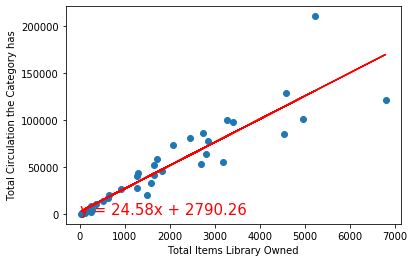

The r-squared is: 0.912121407888663


In [104]:
x_values = smcl_count_summary_table["Total Items"]
y_values = smcl_count_summary_table["Total Circ"]

plt.scatter(x_values,y_values)
plt.xlabel('Total Items Library Owned')
plt.ylabel('Total Circulation the Category has')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")

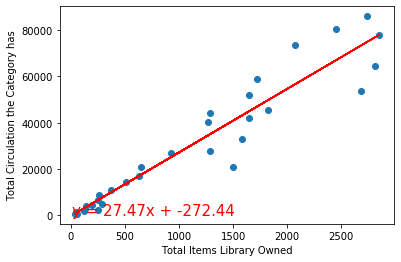

The r-squared is: 0.9523074955975098


In [123]:
under_3000 = smcl_count_summary_table[smcl_count_summary_table["Total Items"] < 3000].dropna()

x_values = under_3000["Total Items"]
y_values = under_3000["Total Circ"]

plt.scatter(x_values,y_values)
plt.xlabel('Total Items Library Owned')
plt.ylabel('Total Circulation the Category has')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")

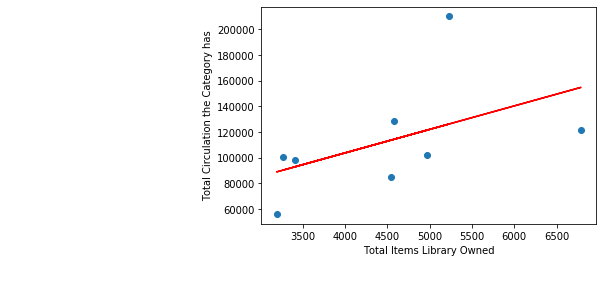

The r-squared is: 0.49545317508731557


In [124]:
over_3000 = smcl_count_summary_table[smcl_count_summary_table["Total Items"] > 3000].dropna()

x_values = over_3000["Total Items"]
y_values = over_3000["Total Circ"]

plt.scatter(x_values,y_values)
plt.xlabel('Total Items Library Owned')
plt.ylabel('Total Circulation the Category has')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")